1. CHARGEMENT DES PACKAGES

In [4]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

2. LA BASE DE DONNEES 

La bases de données "Titanic" est disponible sur Kaggle.Cette base de données contient des informatiosn sur les passagers embarqués sur le navire Titanic et surtout sur l'information du passager s'il a survécu au naufrage ou non.Les caractéristiques sont l'âge,le sex,le numéro d'embarquement,la classe,le numéro de la cabine etc..;

2.1  Contenu de la base de donnees:

La base de données contient les colonnes suivantes:
. PassengerId : Identifiant du passager
. Survived : Le passager a survécu ou non (1 pour 0 pour non)
. Pclass :  La classe d embarquement (numerote de 1 à 3)
. Name : Le nom du passager
. Sex : le sex du passage (male: homme, female:femme)
. Age : Age du passager
. SibSp:
. Parch: 
. Ticket : Le numéro du ticket
. Fare :
. Cabin :
. Embarked: Type d embarquement,il y en a deux type C et S


2.2 L'objectif de l'analyse

L'objectif de cette analyse est de construire un modèle de classification pour prédire si un passager a survécu ou non au naufrage du titanic. Cette base de données sera divisée en ensembles d'apprentissage et de test pour entraîner et évaluer les performances du modèle.Les prévus utilisés sont: 
a. La régression logistique
b.Random Forest
c.SVM (Support Vector Machine)


3. Importation et nettoyage des données.

In [5]:
 #Chargement des données
df=pd.read_csv("titanic.csv")

In [6]:
#Affichage des cinq premières lignes
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#Affichage de cinq dernières informations
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
#Affichage des informations générales sur la base de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


3.1 Description des données

In [9]:
#Les valeurs manquantes
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#Statisques descriptives 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


3.2 Gestion des variables manquantes

In [11]:
df['Age']=df["Age"].fillna(df['Age'].median())
df["Embarked"]=df["Embarked"].fillna(df['Embarked'].mode()[0])
df["Sex"]=df["Sex"].fillna(df["Sex"].mode()[0])

In [12]:
#Vérification si les valeurs manquantes existent encore
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

DATA VISUALISATION
1. HISTOGRAMME


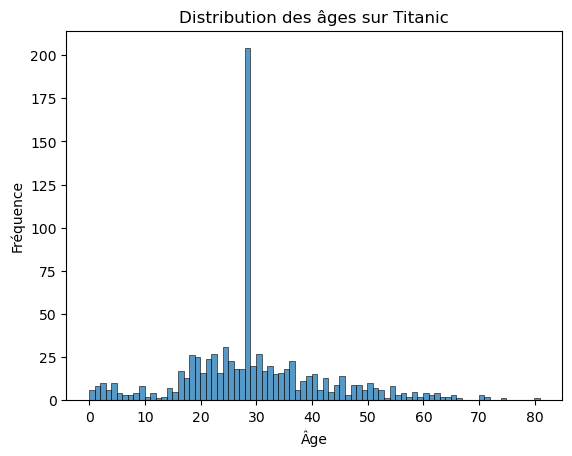

In [13]:
#Histogramme
sns.histplot(x=df["Age"],discrete=True)
plt.title("Distribution des âges sur Titanic")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()

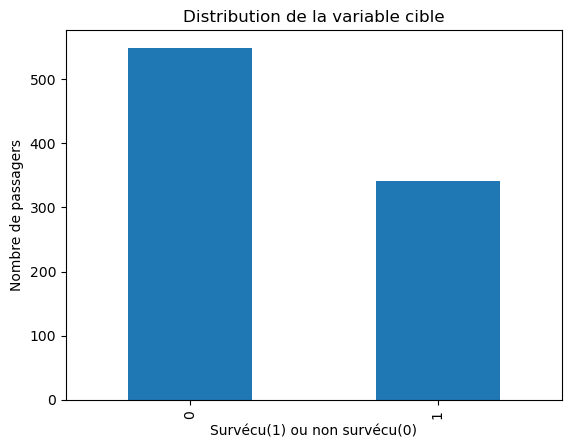

In [14]:
#Diagramme en barre de la variable "Survived"
df["Survived"].value_counts().plot(kind='bar')
plt.title("Distribution de la variable cible")
plt.xlabel('Survécu(1) ou non survécu(0)')
plt.ylabel('Nombre de passagers')
plt.show()

2. BoxPLOT

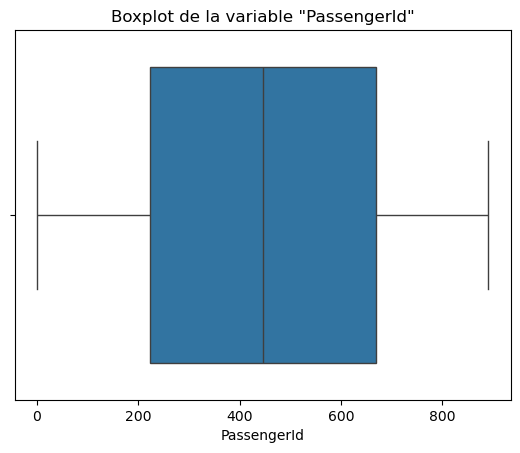

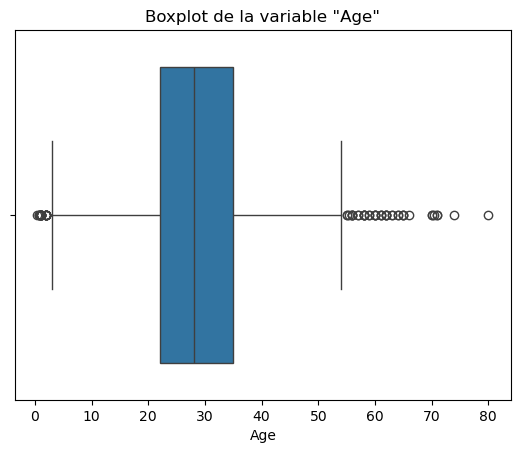

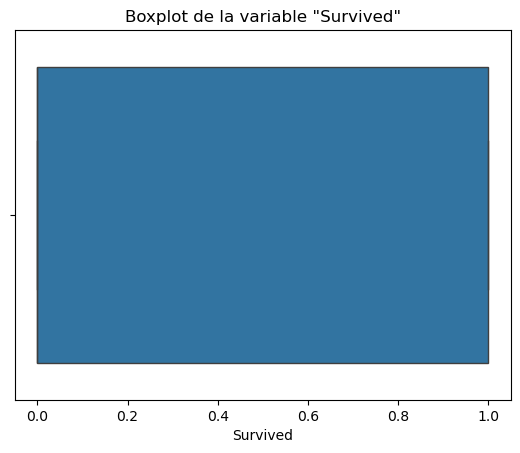

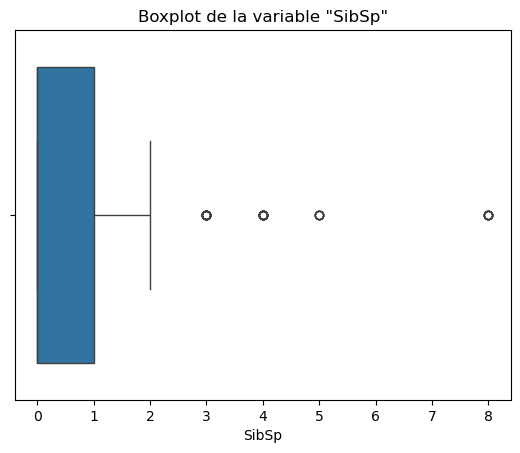

In [15]:
#Diagramme en boîte pour chaque variable numérique
for col in ["PassengerId","Age","Survived","SibSp"]:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de la variable "{col}"')
    plt.show()

3. Analyse des liaisons entre les variables

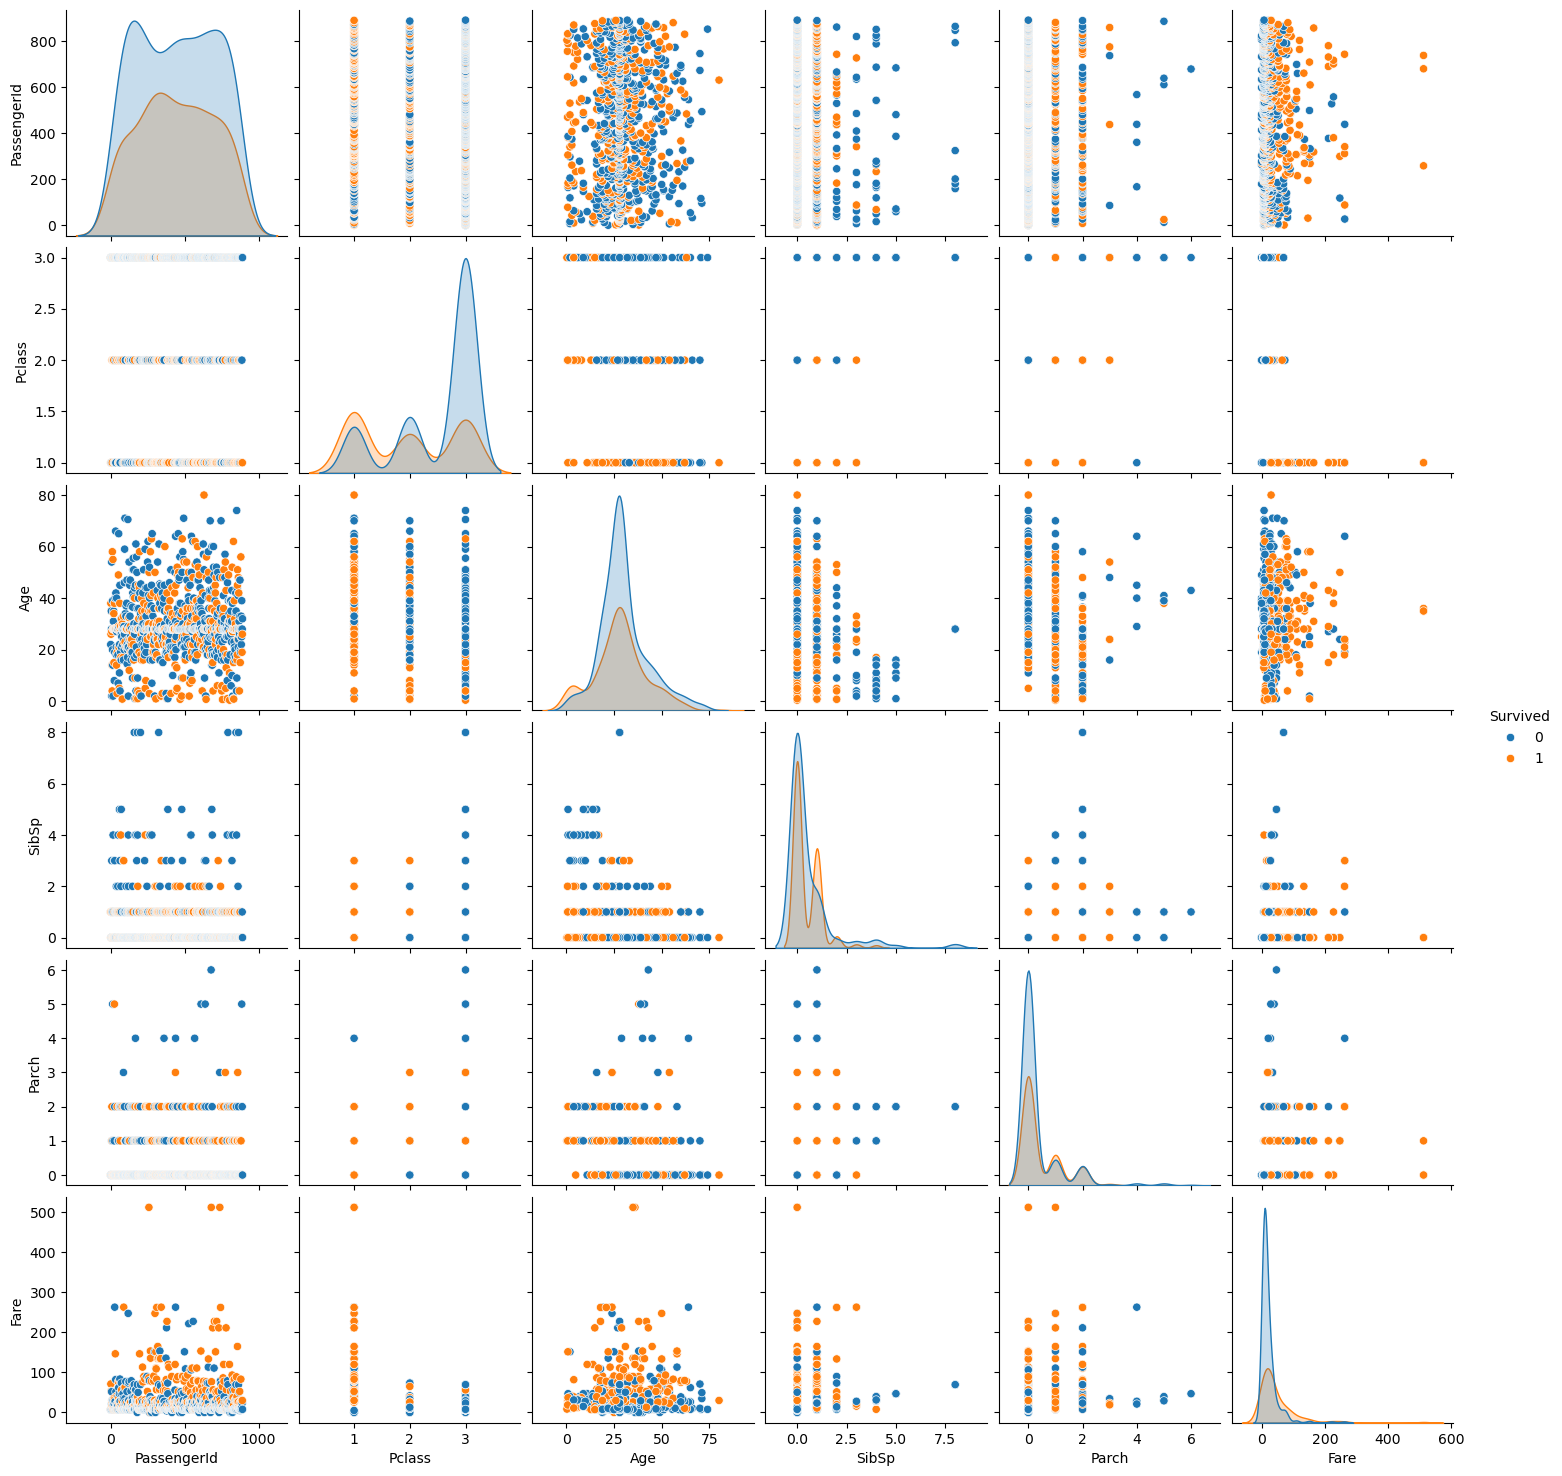

In [16]:
#Le pairplot
sns.pairplot(df,hue='Survived')

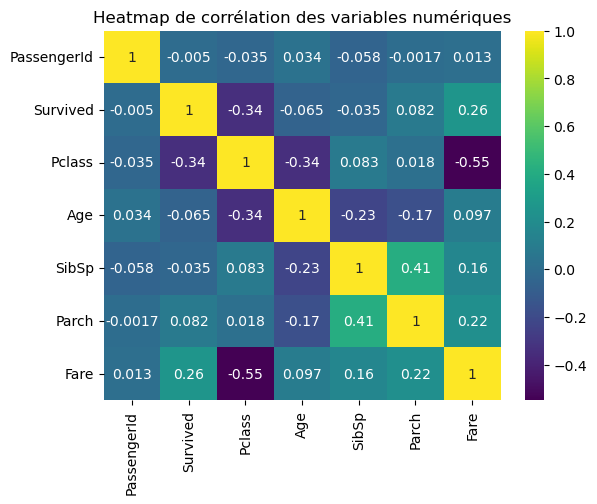

In [17]:
#Sélection des variables nulériques
num_vars=df.select_dtypes(include="number")
#Génération de la heatmap de corrélation
sns.heatmap(data=num_vars.corr(),annot=True,cmap='viridis')
plt.title("Heatmap de corrélation des variables numériques")
plt.show()

4. Modélisation de la classification

4.1 Division des données

In [18]:
#Importation des packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [19]:
#Encodage de quelques variables
Le=LabelEncoder()
df["Sex"]=Le.fit_transform(df["Sex"])

In [20]:

df["Pclass"] = OrdinalEncoder().fit_transform(df[["Pclass"]])



In [25]:
#df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True) #Suppresion de certaines colonnes


In [30]:
#Encodage de la variable "Embarked"
#df=pd.get_dummies(df,columns=["Embarked"],drop_first=True)

In [33]:
#Normalisation des variables
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[["Age","Parch"]]=scaler.fit_transform(df[["Age","Parch"]])

In [36]:
df[["Embarked_Q","Embarked_S"]]=df[["Embarked_Q","Embarked_S"]].astype(int)

In [38]:
#Séparation des données 
X=df.drop('Survived',axis=1)
y=df["Survived"]

In [43]:
#Importation des packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [44]:
#Division des données en entraînement et test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
#La régression logistique
log=LogisticRegression(max_iter=200)#initialisation du modèle
log_reg=log.fit(X_train,y_train)#initialisation du modèle
y_logpred=log_reg.predict(X_test) #Prédition du modèle

In [46]:
#Importation des packages d'évaluation
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [47]:
#Evaluation du modèle
acc_lr=accuracy_score(y_test,y_logpred)
cl_lr=classification_report(y_test,y_logpred)
cm_lr=confusion_matrix(y_test,y_logpred)

In [58]:
#Affichage des évaluations
print("Score de précision lr\n",acc_lr)
print("Rapport de clasification lr\n",cl_lr)
print("Matrice de confusion lr\n",cm_lr)

Score de précision lr
 0.8100558659217877
Rapport de clasification lr
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Matrice de confusion lr
 [[90 15]
 [19 55]]


Text(0.5, 1.0, 'Matrice de confusion de la régression logistique')

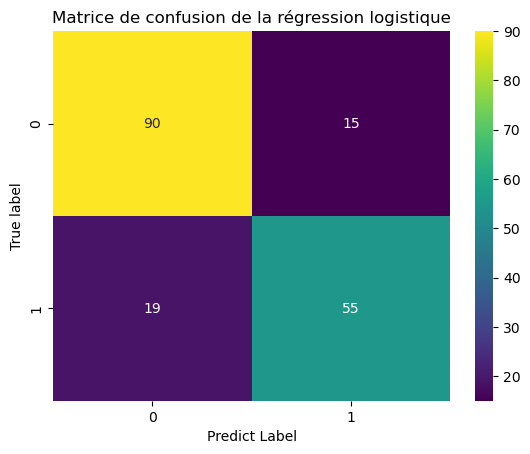

In [54]:
#Construction de la heatmap de la matrice de confusion
sns.heatmap(cm_lr,annot=True,cmap='viridis')
plt.xlabel("Predict Label")
plt.ylabel("True label")
plt.title("Matrice de confusion de la régression logistique")

In [56]:
#Random_Forest
rf_c=RandomForestClassifier(n_estimators=200)#Initialisation du modèle
rfc=rf_c.fit(X_train,y_train)#Entraînement du modèle
y_pred=rfc.predict(X_test)#Prédition du modèle

In [57]:
#Evaluation du modèle
acc_rfc=accuracy_score(y_test,y_pred)
cl_rfc=classification_report(y_test,y_pred)
cm_rfc=confusion_matrix(y_test,y_pred)

In [59]:
#Affichage de l'évaluation
print("Score de précision lr\n",acc_rfc)
print("Rapport de clasification lr\n",cl_rfc)
print("Matrice de confusion lr\n",cm_rfc)


Score de précision lr
 0.8268156424581006
Rapport de clasification lr
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Matrice de confusion lr
 [[91 14]
 [17 57]]


Text(0.5, 1.0, 'Matrice de confusion de la Random Forest')

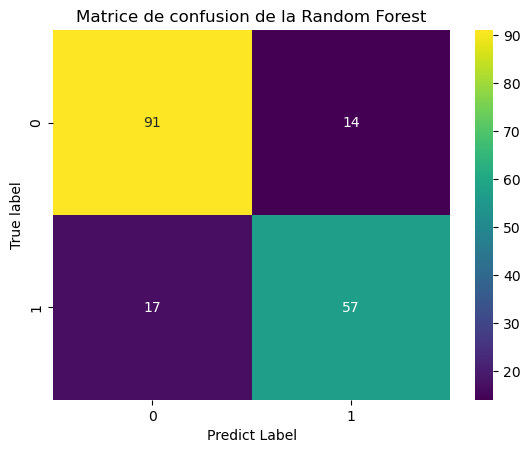

In [60]:
#Affichage de la heatmap de la matrice de confusion
sns.heatmap(cm_rfc,annot=True,cmap='viridis')
plt.xlabel("Predict Label")
plt.ylabel("True label")
plt.title("Matrice de confusion de la Random Forest")

In [61]:
#Le plus proches voisins
k_nn=KNeighborsClassifier(n_neighbors=5)#initialisation
knn=k_nn.fit(X_train,y_train)#Entraînement du modèle
y_k_pred=knn.predict(X_test) #Prédition du modèle


In [62]:
#Evaluation du modèle
acc_knn=accuracy_score(y_test,y_pred)
cl_knn=classification_report(y_test,y_pred)
cm_knn=confusion_matrix(y_test,y_pred)

In [63]:
#Affichage des évaluations
print("Score de précision lr\n",acc_knn)
print("Rapport de clasification lr\n",cl_knn)
print("Matrice de confusion lr\n",cm_knn)


Score de précision lr
 0.8268156424581006
Rapport de clasification lr
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Matrice de confusion lr
 [[91 14]
 [17 57]]


Text(0.5, 1.0, 'Matrice de confusion du KNeighborsClassifier')

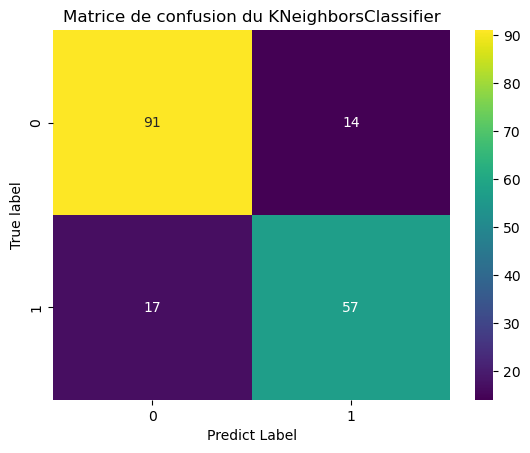

In [64]:
#Affichage de la heatmap
sns.heatmap(cm_knn,annot=True,cmap='viridis')
plt.xlabel("Predict Label")
plt.ylabel("True label")
plt.title("Matrice de confusion du KNeighborsClassifier")
